Loading the IMDB dataset

In [8]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


Training Data Set

In [6]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

1

Restricting yourself to the top 10,000 most frequent words, no word index will exceed 10,000.

In [8]:
max([max(sequence) for sequence in train_data])

9999

Decode one of these reviews back to English words

In [65]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
	

Encoding the integer sequences into a binary matrix

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

Here’s what the samples look like now

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Vectorizing the labels

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

The model definition - With Sigmoid Activation Function

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compiling the model

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Configuring the optimizer

In [15]:
from keras import optimizers

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Setting aside a validation set

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model with 20 Epohs and mini batch size of 512 samples.

In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5045 - acc: 0.7907 - val_loss: 0.3831 - val_acc: 0.8666
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3015 - acc: 0.9038 - val_loss: 0.3151 - val_acc: 0.8742
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2205 - acc: 0.9283 - val_loss: 0.2994 - val_acc: 0.8795
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1766 - acc: 0.9437 - val_loss: 0.2832 - val_acc: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1420 - acc: 0.9546 - val_loss: 0.2968 - val_acc: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1156 - acc: 0.9661 - val_loss: 0.3202 - val_acc: 0.8772
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0948 - acc: 0.9732 - val_loss: 0.3113 - val_acc: 0.8835
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0789 - a

Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let’s look at it

In [18]:
>>> history_dict = history.history
>>> history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

Plotting the training and validation loss

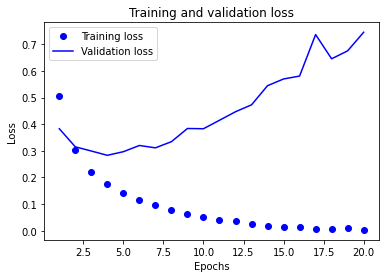

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Plotting the training and validation accuracy

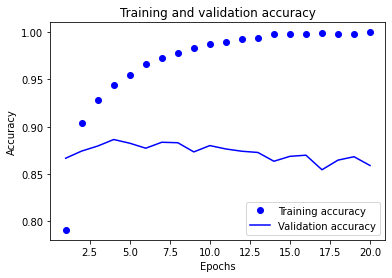

In [29]:
plt.clf()
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


Retraining a model from scratch

In [67]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
18/18 [==============================] - 2s 62ms/step - loss: -25.0629 - accuracy: 0.0475
Epoch 2/4
18/18 [==============================] - 1s 29ms/step - loss: -87.9239 - accuracy: 0.0481
Epoch 3/4
18/18 [==============================] - 1s 29ms/step - loss: -174.6886 - accuracy: 0.0481
Epoch 4/4
71/71 [==============================] - 0s 2ms/step - loss: -385.6878 - accuracy: 0.0467


In [32]:
model.predict(x_test)

array([[0.14122367],
       [0.99979675],
       [0.6931313 ],
       ...,
       [0.10458726],
       [0.05802438],
       [0.49295238]], dtype=float32)

In [33]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [35]:
len(train_data)

8982

In [36]:
len(test_data)

2246

In [37]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [38]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])


565248/550378 [==============================] - 0s 0us/step


In [39]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [40]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [41]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [42]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [43]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [45]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 68ms/step - loss: 2.7205 - accuracy: 0.5273 - val_loss: 1.7621 - val_accuracy: 0.6560
Epoch 2/20
16/16 [==============================] - 1s 60ms/step - loss: 1.4527 - accuracy: 0.7119 - val_loss: 1.3325 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.0840 - accuracy: 0.7771 - val_loss: 1.1423 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.8596 - accuracy: 0.8261 - val_loss: 1.0517 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 1s 60ms/step - loss: 0.6883 - accuracy: 0.8597 - val_loss: 0.9736 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 1s 54ms/step - loss: 0.5535 - accuracy: 0.8865 - val_loss: 0.9409 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 58ms/step - loss: 0.4427 - accuracy: 0.9080 - val_loss: 0.8916 - val_accuracy: 0.8240
Epoch 8/20
16

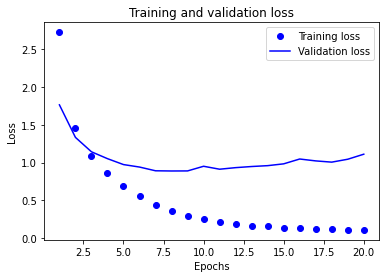

In [46]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

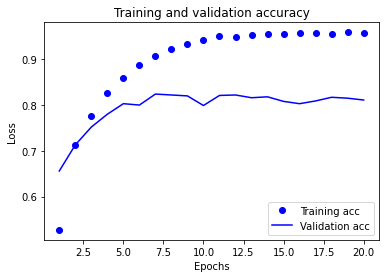

In [50]:
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [51]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 100ms/step - loss: 2.6898 - accuracy: 0.5079 - val_loss: 1.7622 - val_accuracy: 0.6530
Epoch 2/9
16/16 [==============================] - 1s 51ms/step - loss: 1.4407 - accuracy: 0.7129 - val_loss: 1.2685 - val_accuracy: 0.7290
Epoch 3/9
16/16 [==============================] - 1s 51ms/step - loss: 1.0450 - accuracy: 0.7790 - val_loss: 1.1077 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 1s 62ms/step - loss: 0.8204 - accuracy: 0.8276 - val_loss: 0.9913 - val_accuracy: 0.7930
Epoch 5/9
16/16 [==============================] - 1s 62ms/step - loss: 0.6506 - accuracy: 0.8664 - val_loss: 0.9190 - val_accuracy: 0.8120
Epoch 6/9
16/16 [==============================] - 1s 54ms/step - loss: 0.5198 - accuracy: 0.8904 - val_loss: 0.9172 - val_accuracy: 0.8020
Epoch 7/9
16/16 [==============================] - 1s 60ms/step - loss: 0.4223 - accuracy: 0.9121 - val_loss: 0.8576 - val_accuracy: 0.8190
Epoch 8/9
16/16 [==

In [52]:
>>> import copy
>>> test_labels_copy = copy.copy(test_labels)
>>> np.random.shuffle(test_labels_copy)
>>> hits_array = np.array(test_labels) == np.array(test_labels_copy)
>>> float(np.sum(hits_array)) / len(test_labels)


0.18967052537845058

In [53]:
predictions = model.predict(x_test)

In [54]:
>>> predictions[0].shape

(46,)

In [55]:
>>> np.sum(predictions[0])

1.0

In [56]:
>>> np.argmax(predictions[0])

3

In [57]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [58]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [63]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=256,
          validation_data=(x_val, y_val))

Epoch 1/20
32/32 [==============================] - 2s 41ms/step - loss: 3.2635 - accuracy: 0.2012 - val_loss: 2.7671 - val_accuracy: 0.2480
Epoch 2/20
32/32 [==============================] - 1s 35ms/step - loss: 2.3547 - accuracy: 0.4550 - val_loss: 2.0452 - val_accuracy: 0.5930
Epoch 3/20
32/32 [==============================] - 1s 31ms/step - loss: 1.7756 - accuracy: 0.6102 - val_loss: 1.7004 - val_accuracy: 0.5980
Epoch 4/20
32/32 [==============================] - 1s 35ms/step - loss: 1.5067 - accuracy: 0.6269 - val_loss: 1.5681 - val_accuracy: 0.6200
Epoch 5/20
32/32 [==============================] - 1s 31ms/step - loss: 1.3247 - accuracy: 0.6624 - val_loss: 1.4643 - val_accuracy: 0.6500
Epoch 6/20
32/32 [==============================] - 1s 31ms/step - loss: 1.1902 - accuracy: 0.6928 - val_loss: 1.3871 - val_accuracy: 0.6800
Epoch 7/20
32/32 [==============================] - 1s 36ms/step - loss: 1.0805 - accuracy: 0.7279 - val_loss: 1.3667 - val_accuracy: 0.6780
Epoch 8/20
32